In [13]:
from biological_fuzzy_logic_networks.utils import read_sif
from biological_fuzzy_logic_networks.draw import draw_BioFuzzNet
from biological_fuzzy_logic_networks.biofuzznet import BioFuzzNet
import networkx as nx

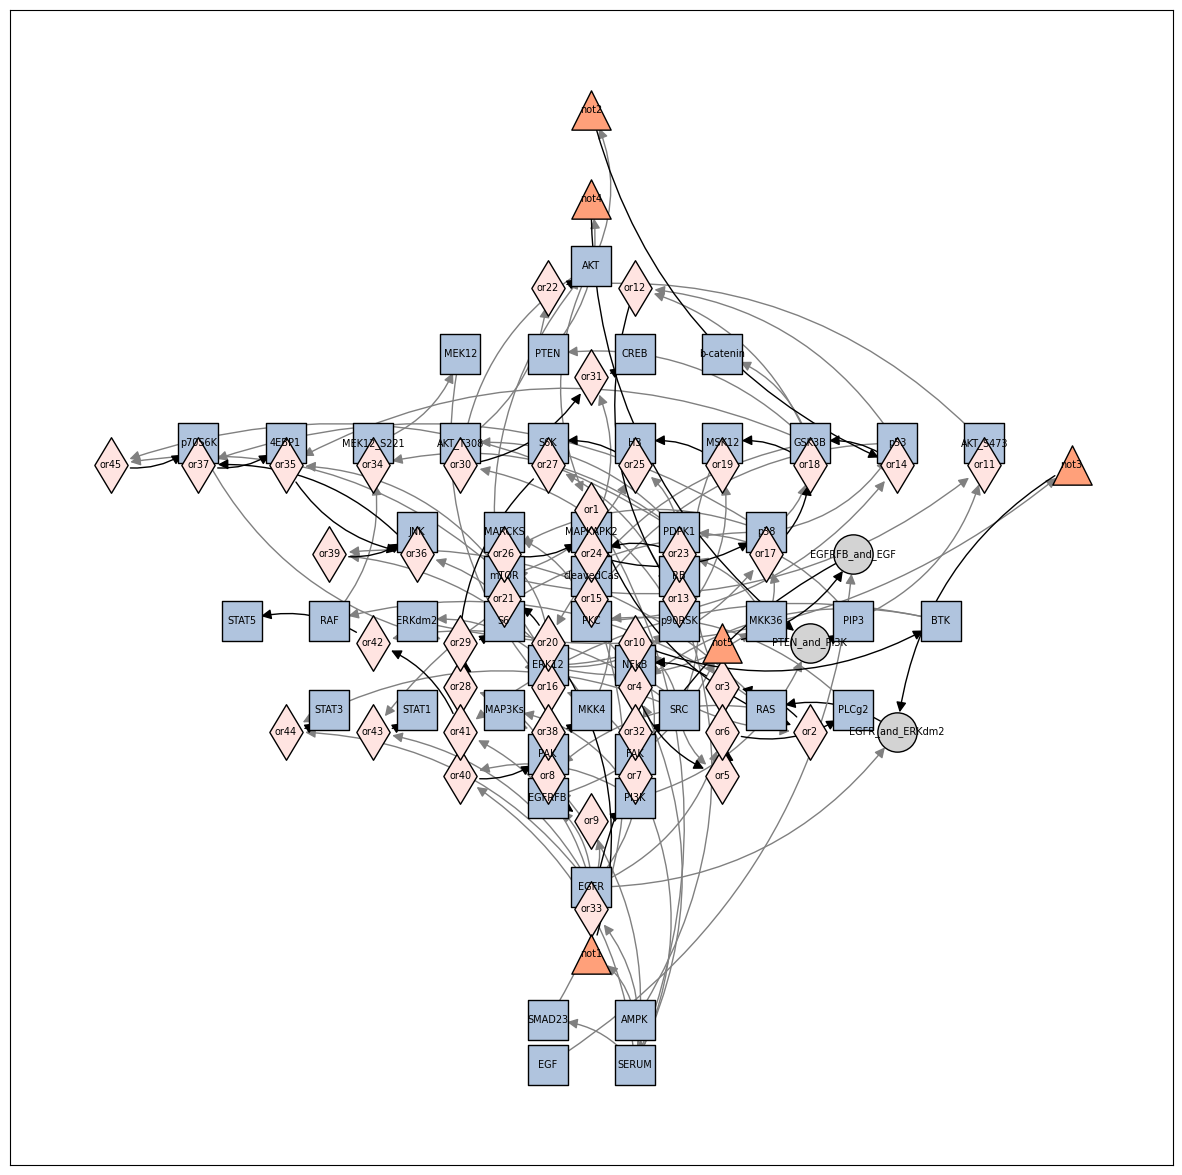

In [14]:
nodes, edges = read_sif("/dccstor/ipc1/CAR/DREAM/DREAMdata/PKN_Alice.sif")
model = BioFuzzNet(nodes, edges)
p = draw_BioFuzzNet(model)

In [15]:
for i in nx.recursive_simple_cycles(model):
    print(i)

['PLCg2', 'PKC', 'or14', 'GSK3B', 'PTEN', 'not4', 'PTEN_and_PI3K', 'PIP3', 'PDPK1', 'or34', 'MEK12_S221', 'MEK12', 'or16', 'ERK12', 'ERKdm2', 'not3', 'EGFR_and_ERKdm2', 'RAS', 'or8', 'or9', 'PI3K', 'or10', 'BTK', 'or4', 'or5', 'or6']
['PLCg2', 'PKC', 'or14', 'GSK3B', 'PTEN', 'not4', 'PTEN_and_PI3K', 'PIP3', 'PDPK1', 'or34', 'MEK12_S221', 'MEK12', 'or16', 'ERK12', 'ERKdm2', 'not3', 'EGFR_and_ERKdm2', 'RAS', 'or8', 'or9', 'PI3K', 'or32', 'SRC', 'or5', 'or6']
['PLCg2', 'PKC', 'or14', 'GSK3B', 'PTEN', 'not4', 'PTEN_and_PI3K', 'PIP3', 'PDPK1', 'or34', 'MEK12_S221', 'MEK12', 'or16', 'ERK12', 'ERKdm2', 'not3', 'EGFR_and_ERKdm2', 'RAS', 'or8', 'or9', 'PI3K', 'or32', 'SRC', 'or10', 'BTK', 'or4', 'or5', 'or6']
['FAK', 'or16', 'ERK12', 'ERKdm2', 'not3', 'EGFR_and_ERKdm2', 'RAS', 'or8', 'or9', 'PI3K', 'or32', 'SRC', 'or7']
['PI3K', 'PTEN_and_PI3K', 'PIP3', 'PDPK1', 'or34', 'MEK12_S221', 'MEK12', 'or16', 'ERK12', 'ERKdm2', 'not3', 'EGFR_and_ERKdm2', 'RAS', 'or8', 'or9']
['PIP3', 'PDPK1', 'AKT_T308'

Leaving us with 6 loops, interestingly. With constances PKN I only have one loop...

In [16]:
model.edges

OutEdgeView([('SERUM', 'SMAD23'), ('SERUM', 'AMPK'), ('SERUM', 'or1'), ('SERUM', 'or4'), ('SERUM', 'or7'), ('SERUM', 'or8'), ('SERUM', 'or33'), ('SERUM', 'or40'), ('PLCg2', 'PKC'), ('FAK', 'or16'), ('PI3K', 'MAP3Ks'), ('PI3K', 'PTEN_and_PI3K'), ('PI3K', 'or10'), ('PI3K', 'or32'), ('PI3K', 'or40'), ('BTK', 'or4'), ('BTK', 'or41'), ('PIP3', 'PDPK1'), ('PIP3', 'or11'), ('AKT_S473', 'or22'), ('p53', 'or12'), ('p53', 'or15'), ('GSK3B', 'b-catenin'), ('GSK3B', 'PTEN'), ('GSK3B', 'or12'), ('GSK3B', 'or20'), ('GSK3B', 'or35'), ('AMPK', 'not1'), ('AMPK', 'or13'), ('SMAD23', 'or15'), ('ERK12', 'MKK36'), ('ERK12', 'ERKdm2'), ('ERK12', 'p90RSK'), ('ERK12', 'or17'), ('ERK12', 'or26'), ('ERK12', 'or36'), ('MSK12', 'or3'), ('MSK12', 'or19'), ('MKK36', 'or17'), ('MKK36', 'or23'), ('p90RSK', 'or19'), ('p90RSK', 'or27'), ('p90RSK', 'or30'), ('mTOR', 'or11'), ('mTOR', 'or25'), ('mTOR', 'or35'), ('mTOR', 'or45'), ('AKT', 'not2'), ('AKT', 'or1'), ('AKT', 'or21'), ('AKT', 'or30'), ('PKC', 'MARCKS'), ('PKC',